[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ianjure/simple-neural-network/blob/main/Notebook/Simple_Neural_Network_Notebook.ipynb)

**Author:** Ian Jure Macalisang

**Email:** ianjuremacalisang2@gmail.com

**Link:** https://github.com/ianjure/simple-neural-network

**NOTE**: UPLOAD **[mnist_train.csv](https://drive.google.com/file/d/1Mif0Xmvh4mubRNbmQrLOIJomFjOJNl5s/view)** FIRST BEFORE RUNNING THE 1ST CELL!

In [17]:
# @title IMPORTING LIBRARIES AND THE DATA { display-mode: "form" }

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist_train.csv')

In [13]:
# @title FORMAT TRAINING DATA { display-mode: "form" }

def Format_Data(Dataframe):
    """
    Convert whole data to array since we will be doing
    matric calculations.
    """
    train_data = np.array(Dataframe)
    M, N = train_data.shape

    """
    Transpose array so that the pixel values will be in columns not in rows,
    because we want to make these values as input nodes.
    """
    train_data_T = train_data.T

    """
    Get the X (pixel values) and Y (True Labels)

    N - The amount of training images we have
    """
    Y = train_data_T[0]
    X = train_data_T[1:N]

    """
    Normalize pixel values from 0-255 (Integer) to 0-1 (Float) by dividing each value with 255.
    In this way, the numbers will be small and the computation becomes easier and faster.
    """
    X = X / 255.

    return X, Y

In [4]:
# @title INITIALIZE THE DATA { display-mode: "form" }

def Initialize(In_Neuron, Hidden_Neuron, Out_Neuron):
    """
    Initialize weights values between -0.5 to 0.5.
    Initialize bias values to 0.

    Arguments:
    In_Neuron - Number of input neurons of the network
    Hidden_Neuron - Number of hidden neurons of the network
    Out_Neuron - Number of output neurons of the network
    """
    # LAYER 1
    W1 = np.random.uniform(-0.5, 0.5, (Hidden_Neuron, In_Neuron))
    B1 = np.zeros((Hidden_Neuron, 1))

    # LAYER 2
    W2 = np.random.uniform(-0.5, 0.5, (Out_Neuron, Hidden_Neuron))
    B2 = np.zeros((Out_Neuron, 1))

    return W1, B1, W2, B2

In [5]:
# @title DENSE LAYER { display-mode: "form" }

def Dense(Weights, Bias, Input):
    """
    The dense layer is a simple layer of neurons in which each
    neuron receives input from all the neurons of the previous layer.

    Z = W * X + B

    Where:
    Z - Output of the dense layer
    W - Weights of the dense layer
    X - Input to the dense layer
    B - Bias of the dense layer
    """
    Output = Weights @ Input + Bias
    return Output

In [6]:
# @title ACTIVATION FUNCTIONS { display-mode: "form" }

def Sigmoid(Input):
    """
    Sigmoid = 1 / 1 + e^-z

    Where:
    z - Input to the activation function

    Explanation:
    Sigmoid equates all values of z to an output ranging between 0 and 1 thus creating an S-shaped graph.
    This was a great step in neural networks as it allowed the outputs of these functions to be more in
    line with standard probability situations.
    """
    Output = 1 / (1 + np.exp(-Input))
    return Output

def Sigmoid_Prime(Input):
    """
    Sigmoid' = Sigmoid(Z) * (1 - Sigmoid(Z))

    Where:
    Z - Input to the activation function

    This is the derivative of the Sigmoid function that is
    used to find the gradient of the activation function.
    """
    Output = (Sigmoid(Input) * (1 - Sigmoid(Input)))
    return Output

def ReLU(Input):
    """
    ReLU = Input if Input > 0
    ReLU = 0 if Input <= 0
    """
    Output = np.maximum(0, Input)
    return Output

def ReLU_Prime(Input):
    """
    ReLU' = 1 if Input > 0
    ReLU' = 0 if Input <= 0
    """
    Output = np.where(Input > 0, 1, 0)
    return Output

In [7]:
# @title LOSS FUNCTION { display-mode: "form" }

def MSE(Y_Prediction, Y_True):
    """
    Mean Squared Error (Batch) = 1 / N * ∑ (ŷ - Y)^2
    Mean Squared Error (Single) = ∑ (ŷ - Y)^2

    Where:
    N - Amount of prediction or true labels passed
    ŷ - Output prediction of the model (Predicted Y)
    Y - True label of the training data (True Y)
    """
    #Output = 1 / np.size(Y_True) * np.sum((Y_Prediction - Y_True) ** 2, axis=0)
    Output = np.sum((Y_Prediction - Y_True) ** 2, axis=0)
    return Output[0]

def MSE_Prime(Y_Prediction, Y_True):
    """
    MSE' (Batch) = 2 * ∑ (ŷ - Y)^2 / N
    MSE' (Single) = ŷ - Y

    Where:
    N - Amount of prediction or true labels passed
    ŷ - Output prediction of the model (Predicted Y)
    Y - True label of the training data (True Y)
    """
    #Output = 2 * (Y_Prediction - Y_True) / np.size(Y_True)
    Output = Y_Prediction - Y_True
    return Output

In [8]:
# @title HELPER FUNCTION { display-mode: "form" }

def One_Hot_Encode(Label):
    """
    One hot encoding is a technique that we use to represent categorical variables
    as numerical values in a machine learning model. Mostly used in classification problems.

    Example:
    Label = 5
    Output = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] - 5th Index is changed to 1 to signify that the
    whole array is of category 5. TLDR; we converted a category into an array that
    we can feed during the backpropagation process.

    Argument:
    Label - Array of the true labels

    Returns:
    ONE_HOT_Y - 2D array of encoded single digit labels
    """

    # CREATE 2D ARRAY OF ZEROES WITH SHAPE: [n x m] n = number of data, m = number of categories
    Output = np.zeros((Label.size, Label.max() + 1))

    # CHANGE ARRAY[i, j] == 1 | Example: array[1,2] - change element into 1 where row is 1 and column is 2.
    Output[np.arange(Label.size), Label] = 1

    # TRANSPOSE 2D ARRAY
    Output = Output.T

    return Output

In [14]:
# @title FORWARD PROPAGATION { display-mode: "form" }

def Forward(X, W1, B1, W2, B2):
    """
    FORWARD PROPAGATION

    INPUT [ X ] -->  HIDDEN LAYER [ Z1 = W1 * X + B1 ]  -->  ACTIVATION FUNCTION [ A1 = Sigmoid(Z1) ]
    -->  OUTPUT LAYER [ Z2 = W2 * A1 + B2 ]  --> ACTIVATION FUNCTION [ A2 = Sigmoid(Z2) ]  -->  PREDICTION!

    Where:
    X - Input data
    W1 - Layer 1 weights
    B1 - Layer 1 biases
    W2 - Layer 2 weights
    B2 - Layer 2 biases

    Returns:
    Z1 - Layer 1 result [ Z1 = W1 * X + B1 ]
    A1 - Z1 result activated [ A1 = Sigmoid(Z1) ]
    Z2 - Layer 2 result [ Z2 = W2 * A1 + B2 ]
    A2 - Z2 result activated [ A2 = Sigmoid(Z2) ]
    """
    # INPUT -> HIDDEN (LAYER 1)
    Z1 = Dense(W1, B1, X) # DENSE LAYER
    A1 = Sigmoid(Z1)  # ACTIVATION LAYER

    # HIDDEN -> OUTPUT (LAYER 2)
    Z2 = Dense(W2, B2, A1) # DENSE LAYER
    A2 = Sigmoid(Z2) # ACTIVATION LAYER

    return Z1, A1, Z2, A2

In [15]:
# @title BACKWARD PROPAGATION { display-mode: "form" }

def Backward(X, Y, Z1, A1, Z2, A2, W1, B1, W2, B2, LR):
    """
    BACKWARD PROPAGATION

    FIND THE DERIVATIVES WITH RESPECT TO THE PARAMETERS --> COMPUTE THE GRADIENTS
    --> USE THE GRADIENTS TO UPDATE THE WEIGHTS AND BIASES VALUES!

    A gradient simply measures the change in all weights with regard to the change in error.
    You can also think of a gradient as the slope of a function.

    Where:
    X - Input data
    Y - True label
    Z1 - Layer 1 result [ Z1 = W1 * X + B1 ]
    A1 - Z1 result activated [ A1 = Sigmoid(Z1) ]
    Z2 - Layer 2 result [ Z2 = W2 * A1 + B2 ]
    A2 - Z2 result activated [ A2 = Sigmoid(Z2) ]
    W1 - Layer 1 weights
    B1 - Layer 1 biases
    W2 - Layer 2 weights
    B2 - Layer 2 biases
    LR - Learning Rate (Alpha)

    Returns:
    W1 - Updated layer 1 weights
    B1 - Updated layer 1 biases
    W2 - Updated layer 2 weights
    B2 - Updated layer 2 biases
    """

    """
    dE2 (GRADIENT OF LAYER 2)
    = DERIVATIVE OF THE COST FUNCTION @ DERIVATIVE OF THE ACTIVATION FUNCTION 2

    USE THIS TO FIND THE GRADIENT WITH RESPECT TO THE WEIGHTS (W2) AND BIAS (B2) OF LAYER 2
    """
    dE2 = MSE_Prime(A2, LABEL) * Sigmoid_Prime(Z2)
    dW2 = dE2 @ A1.T
    dB2 = dE2

    """
    dA1 (INTERMEDIATE GRADIENT)
    = TRANSPOSE OF THE PARAMETER THAT AFFECTS A1 (W2) @ GRADIENT OF LAYER 2 (dE2)

    USE THIS TO FIND THE GRADIENT OF LAYER 1
    """
    dA1 = W2.T @ dE2

    """
    dE2 (GRADIENT OF LAYER 1)
    = INTERMEDIATE GRADIENT @ DERIVATIVE OF THE ACTIVATION FUNCTION 1

    USE THIS TO FIND THE GRADIENT WITH RESPECT TO THE WEIGHTS (W1) AND BIAS (B1) OF LAYER 1
    """
    dE1 = dA1 * Sigmoid_Prime(Z1)
    dW1 = dE1 @ IMG.T
    dB1 = dE1

    """
    UPDATE WEIGHTS AND BIASES VALUES USING THE GRADIENTS

    New Weights = Previous Weights - Alpha (Learning Rate) * Gradient of the Weights
    New Bias = Previous Bias - Alpha (Learning Rate) * Gradient of the Bias
    """
    W2 = W2 - LR * dW2
    B2 = B2 - LR * dB2
    W1 = W1 - LR * dW1
    B1 = B1 - LR * dB1

    return W2, B2, W1, B1

In [16]:
# @title TRAINING{ display-mode: "form" }

X_train, Y_train = Format_Data(data)
images = X_train.T
labels = One_Hot_Encode(Y_train).T

# INITIALIZE WEIGHTS AND BIASES
W1, B1, W2, B2 = Initialize(784, 20, 10)

# TRACK ACCURACY AND LOSS
accuracy = 0
loss = 0

# HYPERPARAMETER
Alpha = 0.01 # @param {type:"number"}
Epochs = 10 # @param {type:"integer"}

"""
SIMPLE NEURAL NETWORK

INPUT -> HIDDEN LAYER [ DENSE LAYER -> ACTIVATION LAYER ]
-> OUTPUT LAYER [ DENSE LAYER -> ACTIVATION LAYER ]
"""

for epoch in range(Epochs):
    for IMG, LABEL in zip(images, labels):

        # ADD A DIMENSION TO IMG AND LABEL
        IMG.shape += (1,) # (784,) -> (784, 1)
        LABEL.shape += (1,) # (10,) -> (10, 1)

        """
        GRADIENT DESCENT:
        FORWARD PASS --> ERROR CALCULATION
        --> BACKWARD PASS --> UPDATE WEIGHTS AND BIASES
        """

        # FORWARD PASS
        Z1, A1, Z2, A2 = Forward(IMG, W1, B1, W2, B2)

        # LOSS AND ACCURACY CALCULATION
        loss = MSE(A2, LABEL)
        accuracy += int(np.argmax(A2) == np.argmax(LABEL))

        # BACKWARD PASS
        W2, B2, W1, B1 = Backward(IMG, LABEL, Z1, A1, Z2, A2, W1, B1, W2, B2, Alpha)

    # TRACK ACCURACY AND LOSS EVERY EPOCH
    print(f"Epoch {epoch} | Accuracy: {round((accuracy / images.shape[0]) * 100, 2)}% | Loss:", "{:.5f}".format(loss))

    # RESET VARIABLES
    accuracy = 0
    loss = 0

Epoch 0 | Accuracy: 65.03% | Loss: 0.51114
Epoch 1 | Accuracy: 86.38% | Loss: 0.19578
Epoch 2 | Accuracy: 89.13% | Loss: 0.11214
Epoch 3 | Accuracy: 90.32% | Loss: 0.08087
Epoch 4 | Accuracy: 91.05% | Loss: 0.06381
Epoch 5 | Accuracy: 91.5% | Loss: 0.05191
Epoch 6 | Accuracy: 91.84% | Loss: 0.04284
Epoch 7 | Accuracy: 92.12% | Loss: 0.03568
Epoch 8 | Accuracy: 92.42% | Loss: 0.03001
Epoch 9 | Accuracy: 92.68% | Loss: 0.02552


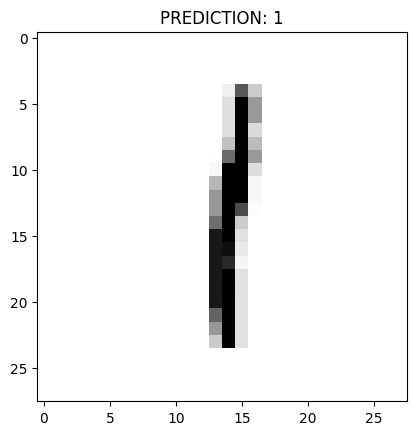

In [22]:
# @title TEST THE MODEL { display-mode: "form" }

index = random.randint(0, images.shape[0]-1)
img = images[index]
plt.imshow(img.reshape(28, 28), cmap="Greys")
img.shape += (1,)

# FORWARD PASS FOR TESTING
Z1 = np.matmul(W1, img) + B1
A1 = Sigmoid(Z1)
Z2 = np.matmul(W2, A1) + B2
A2 = Sigmoid(Z2)

# PREDICTION
plt.title(f"PREDICTION: {A2.argmax()}")
plt.show()

# $\mathrm{THE}$ $\mathrm{MATHEMATICS}$ $\mathrm{BEHIND}$

## $\mathrm{FORWARD-PROPAGATION}$

$Z1 = W1 * A0 + b1$

$A1 = act^1(Z1)$

$Z2 = W2 * A1 + b2$

$A2 = act^2(Z2)$

<br />

$where,$

$A0$ - Data Input

$W1$ - Weights of Layer 1

$b1$ - Bias of Layer 1

$W2$ - Weights of Layer 2

$b2$ - Bias of Layer 2

$act^1$ - Activation Function of Layer 1

$act^2$ - Activation Function of Layer 2

## $\mathrm{BACKWARD-PROPAGATION}$

</br>

## **COMPUTING THE GRADIENTS**

$dE2 = \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} = (A2 - \hat{y}) \cdot act^2\prime(z2)$

$where,$

$A2$ - Output of the Network

$\hat{y}$ - True Label

$act^2\prime$ - Derivative of the Activation Function of Layer 2

<br />

$dW2 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial W2} = dE2 \cdot \frac{\partial Z2}{\partial W2} = dE2 \cdot A1.T$

$where,$

$\frac{\partial Z2}{\partial W2} = \frac{\partial(W2*A1+b2)}{\partial W2} = A1$

$T$ - Matrix Transposed

<br />

$db2 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial b2} = dE2 \cdot \frac{\partial Z2}{\partial b2} = dE2 \cdot 1$

$where,$

$\frac{\partial Z2}{\partial b2} = \frac{\partial(W2*A1+b2)}{\partial b2} = 1$

<br />

$dA1 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial A1} = dE2 \cdot \frac{\partial Z2}{\partial A1} = dE2 \cdot W2.T$

$where,$

$\frac{\partial Z2}{\partial A1} = \frac{\partial(W2*A1+b2)}{\partial A1} = W2$

$T$ - Matrix Transposed

<br />

$dE1 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial A1} \cdot \frac{\partial A1}{\partial Z1}= dA1 \cdot \frac{\partial A1}{\partial Z1} = dA1 \cdot act^1\prime(z1)$

$where,$

$act^1\prime$ - Derivative of the Activation Function of Layer 1

<br />

$dW1 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial A1} \cdot \frac{\partial A1}{\partial Z1} \cdot \frac{\partial Z1}{\partial W1} = dE1 \cdot \frac{\partial Z1}{\partial W1} = dE1 \cdot A0.T$

$where,$

$\frac{\partial Z1}{\partial W1} = \frac{\partial(W1*A0+b1)}{\partial W1} = A0$

$A0$ - Data Input

$T$ - Matrix Transposed

<br />

$db1 =  \frac{\partial C}{\partial A2} \cdot \frac{\partial A2}{\partial Z2} \cdot \frac{\partial Z2}{\partial A1} \cdot \frac{\partial A1}{\partial Z1} \cdot \frac{\partial Z1}{\partial b1} = dE1 \cdot \frac{\partial Z1}{\partial b1} = dE1 \cdot 1$

$where,$

$\frac{\partial Z1}{\partial b1} = \frac{\partial(W1*A0+b1)}{\partial b1} = 1$

<br />

## **UPDATING THE WEIGHTS AND BIASES**

$W1 = W1 - \alpha * dW1$

$b1 = b1 - \alpha * db1$

$W2 = W2 - \alpha * dW2$

$b2 = b2 - \alpha * db2$

$where,$

$\alpha$ - Learning Rate

$dW1, db1, dW2, db2$ - Gradients